# Bagging

The dataset can be found in the link - https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

Alternatively, you can download the dataset from the same segment on upGrad platform 

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read in the data and display the first 5 rows:
data = pd.read_csv('hmeq-preprocessed.csv')
display(data.head())

,bad_loan,loan_request,amt_due_on_mort,value_of_property,years_at_job,num_derog_reports,num_delinq_lines,oldest_cl_age,num_recent_cl,num_of_cl,debt_to_inc_ratio,reason_for_loan_DebtCon,reason_for_loan_HomeImp,occupation_Mgr,occupation_Office,occupation_Other,occupation_ProfExe,occupation_Sales,occupation_Self
0,1.0,-1.563111,-1.092273,-1.119977,0.204896,-0.287802,-0.390777,-1.010801,-0.105982,-1.245799,0.100426,0,1,0,0,1,0,0,0
1,1.0,-1.545527,-0.083958,-0.611919,-0.263303,-0.287802,1.444855,-0.689082,-0.693180,-0.749574,0.100426,0,1,0,0,1,0,0,0
2,1.0,-1.527943,-1.374281,-1.506102,-0.664616,-0.287802,-0.390777,-0.365411,-0.105982,-1.146554,0.100426,0,1,0,0,1,0,0,0
3,0.0,-1.510359,0.549123,0.142169,-0.798387,-0.287802,-0.390777,-1.022905,-0.693180,-0.749574,0.100426,0,1,0,1,0,0,0,0
4,1.0,-1.510359,-0.985310,-1.097579,0.004239,-0.287802,-0.390777,-0.927646,-0.105982,-1.345045,0.362816,0,1,0,0,1,0,0,0


### 1. Get the distribution of the target variable using countplot: `bad_loan`

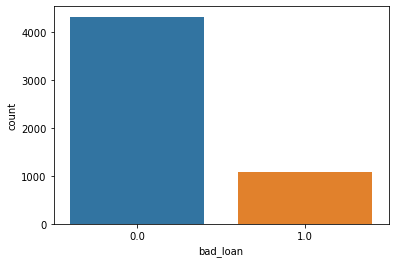

In [3]:
sns.countplot(x='bad_loan', data=data)
plt.show()

In [4]:
# separate target variable from features
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

print(data.shape)
print(X.shape)
print(y.shape)

# partition data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42
                                                    )

(5402, 19)
(5402, 18)
(5402,)


### 2. Compute the baseline classification accuracy for `X_train`?
> - HINT: The [DummyClassifier](#https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) may be helpful.
> - Use the `most_frequent` strategy of calculating the baseline accuracy

In [5]:
#Import Dummy Classifier
from sklearn.dummy import DummyClassifier

In [6]:
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)


### For verifying answer:
print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.7988895743368292


In [7]:
def create_bootstrap_sample(df):
    return df.sample(n= df.shape[0], replace = True)

bootstrap_sample = create_bootstrap_sample(X_train)

print('Number of rows should be the same:')
print('Number of rows in X_train:  ', X_train.shape[0])
print('Number of rows in bootstrap:', create_bootstrap_sample(X_train).shape[0])

print(bootstrap_sample)

Number of rows should be the same:
Number of rows in X_train:   3781
Number of rows in bootstrap: 3781
      loan_request  amt_due_on_mort  value_of_property  years_at_job  \
2940     -0.121221        -0.130799           0.505636      1.341950   
1715     -0.534446        -0.437768          -0.706941     -0.798387   
3909      0.327171         0.519119           0.288663      0.004239   
1608     -0.578406         1.535238           0.929309     -0.664616   
744      -0.877334        -0.237077          -0.441125      1.341950   
...            ...              ...                ...           ...   
4864      1.065700         1.010009           1.093427      1.074408   
3746      0.248043         0.440175           0.634022     -0.530845   
2530     -0.261894        -0.803557          -0.924814     -0.397074   
1180     -0.719078         1.209674           1.397034     -0.129532   
4089      0.423883         1.611740           1.334303     -0.530845   

      num_derog_reports  num_del

### 3. Use the [`BaggingClassifier`](#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) class from Scikit-Learn, instantiate and fit a model with all the training data.
> **Make sure to set the `random_state` parameter using `BaggingClassifier(random_state=42)` to ensure reproducibility!**

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_bagging = BaggingClassifier(random_state = 42)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)

print(' Accuracy = ', acc_bagging)

 Accuracy =  0.8969771745835904


In [9]:
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)
print('Classification Report:\n')
print(classification_report(y_test, pred_bagging))

Classification Report:

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94      1295
         1.0       0.80      0.64      0.72       326

    accuracy                           0.90      1621
   macro avg       0.86      0.80      0.83      1621
weighted avg       0.89      0.90      0.89      1621



In [10]:
def print_recall_scores(ensemble, feats, true_labels):
    '''
    Prints the recall scores for base estimators in a sklearn ensemble model.
    '''
    scores = []
    for model_idx, model in enumerate(ensemble.estimators_):
        if model_idx == 0:
            print('='*40)
        preds = model.predict(feats)
        scores.append(recall_score(true_labels, preds))
        model_recall = np.round(recall_score(true_labels, preds), 5)
        print(f'Recall for Base Model {model_idx+1}:\t', model_recall)
        if model_idx < (len(ensemble.estimators_) - 1):
            print('-'*40)
        else:
            print('='*40)
    ensemble_preds = ensemble.predict(feats)
    print("Mean Recall Score:\t\t", np.round(np.array(scores).mean(), 5))
    print("Std Deviation:\t\t\t", np.round(np.array(scores).std(), 5))
    print("Range:\t\t\t\t", np.round(np.array(scores).ptp(), 5))
    print(f'Overall Recall for model:\t {np.round(recall_score(y_test, ensemble_preds), 5)}')

In [11]:
print_recall_scores(model_bagging, X_test, y_test)

Recall for Base Model 1:	 0.61963
----------------------------------------
Recall for Base Model 2:	 0.62577
----------------------------------------
Recall for Base Model 3:	 0.6227
----------------------------------------
Recall for Base Model 4:	 0.61043
----------------------------------------
Recall for Base Model 5:	 0.59816
----------------------------------------
Recall for Base Model 6:	 0.64417
----------------------------------------
Recall for Base Model 7:	 0.60429
----------------------------------------
Recall for Base Model 8:	 0.61656
----------------------------------------
Recall for Base Model 9:	 0.66258
----------------------------------------
Recall for Base Model 10:	 0.62883
Mean Recall Score:		 0.62331
Std Deviation:			 0.01798
Range:				 0.06442
Overall Recall for model:	 0.64417
